In [28]:
import torch
import sys
import os
import json
import numpy as np
import yaml
from tqdm import tqdm
import pandas as pd
import argparse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sys.path.append("src/eval/plotting")
from plotting.plotutils import *
%load_ext autoreload
%autoreload 2

current_dir = os.path.dirname(os.path.abspath(__file__))
environment_eval_dir = os.path.join(current_dir, "eval_experiments_and_configs", "robotarium_gym:HeterogeneousSensorNetwork-v0")
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# models to plot
# Plot the training curves for this models
save_plots_path = os.path.join(environment_eval_dir, "eval_figures")
models_dict = {
    "SC_4_agents_HSN" : {
        "seed": [1, 2, 3],
        "name": "CA+CC(GNN)"},

    "MLP_4_agents_HSN" : {
        "seed": [1, 2, 3],
        "name": "CA(MLP)"},

    "SC_CASKIP_4_agents_HSN" : {
        "seed": [1, 2],
        "name": "CA(GNN)"},

    "SC_ID_4_agents_REDO" : {
        "seed": [1, 2, 3],
        "name": "ID(GNN)"},

    "MLP_ID_4_agents_HSN" : {
        "seed": [4, 5, 6],
        "name": "ID(MLP)"},
}

In [30]:
class DictView(object):
        def __init__(self, d):
            self.__dict__ = d
        def __str__(self):
             
             return(str(self.__dict__))

def load_models_training_metrics(experiment_dir, sacred_run, environment, results_rel_dir="results"):
    """Load the metrics from training and plot them"""
    sacred_dir = os.path.join(experiment_dir, results_rel_dir, "sacred_runs", environment.split(":")[-1], str(sacred_run))
    
    # loads the configuration from the sacred experiment (primarly config related to the model)
    with open(os.path.join(sacred_dir, "metrics.json"), 'r') as f:
        metrics = json.load(f)
    return metrics

def reformat_metrics(metrics):
     """"""
     print(metrics)
     
       

/home/dwalkerhowell3/star_lab/ca-gnn-marl/eval/plotting/plotutils.py:127: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


(<Figure size 1170x827 with 1 Axes>,
 <Axes: xlabel='Environment Steps', ylabel='Average Return'>)

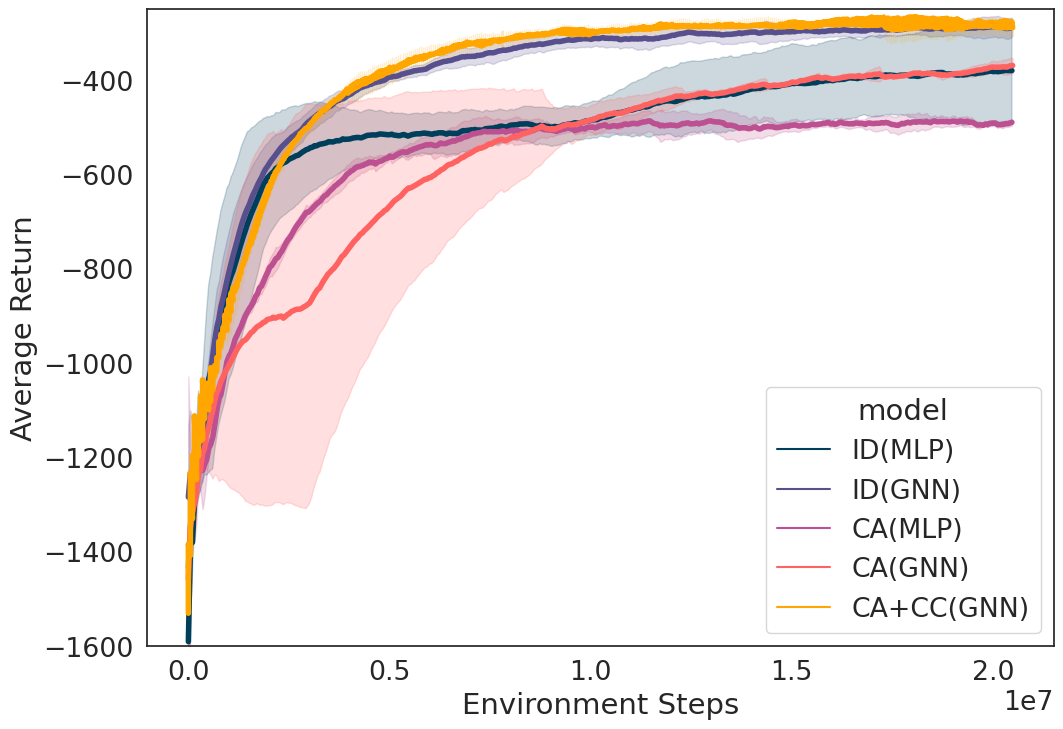

In [36]:
environment = "robotarium_gym:HeterogeneousSensorNetwork-v0"
experiment_path = os.path.join(environment_eval_dir, "experiments")
# open the sacred directory and get the metrics file

# build a dataframe of all the models you want to plot
all_data = []
for og_model_name, plot_context in models_dict.items():
    seed_list = plot_context["seed"]
    plot_model_name = plot_context["name"]
    experiment_dir = os.path.join(experiment_path, og_model_name)

    for seed in seed_list:
        metrics = load_models_training_metrics(experiment_dir, seed, environment, "results")["test_return_mean"]
        metrics_df = pd.DataFrame(metrics)
        metrics_df["model"] = plot_model_name
        metrics_df["seed"] = seed
        all_data.append(pd.DataFrame(metrics_df))
    
pd.concat(all_data)
hue_order = ["ID(MLP)", "ID(GNN)", "CA(MLP)", "CA(GNN)", "CA+CC(GNN)"]
data = pd.concat(all_data)


plot_training_curves(data=data, smoothing_factor=0.025, hue_order=hue_order,
                     ylabel="Average Return", xlabel="Environment Steps",
                     save_path=save_plots_path, fig_name="training_avg_return.png", ylim=[-1600, -250])
